In [2]:
from google.cloud import bigquery
client = bigquery.Client()

query = """
SELECT *
FROM `tonal-studio-480404-r9.vendordata.vendor_summary`
"""

df = client.query(query).to_dataframe()

df.head()




,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,54,AAPER ALCOHOL & CHEMICAL CO,990,Ethyl Alcohol 200 Proof,105.07,134.49,3750.0,1,105.07,0,0.00,0.00,0.00,0.48,-105.07,-inf,0.000000,0.000000
1,60,ADAMBA IMPORTS INTL INC,771,Bak's Krupnik Honey Liqueur,11.44,14.99,750.0,39,446.16,47,494.67,704.53,37.01,367.52,258.37,36.672675,1.205128,1.579097
2,60,ADAMBA IMPORTS INTL INC,3401,Vesica Vodka,11.10,14.99,1750.0,6,66.60,0,0.00,0.00,0.00,367.52,-66.60,-inf,0.000000,0.000000
3,60,ADAMBA IMPORTS INTL INC,3979,Vesica Potato Vodka,16.27,20.99,1750.0,4687,76257.49,3931,41682.51,66871.69,7224.06,367.52,-9385.80,-14.035536,0.838703,0.876920
4,1703,ALISA CARR BEVERAGES,90604,Ch Lynch Bages Pauilac,78.42,119.99,750.0,118,9253.56,76,2639.78,9119.24,8.53,172.00,-134.32,-1.472930,0.644068,0.985485


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorNumber           10692 non-null  Int64  
 1   VendorName             10692 non-null  object 
 2   Brand                  10692 non-null  Int64  
 3   Description            10692 non-null  object 
 4   PurchasePrice          10692 non-null  float64
 5   ActualPrice            10692 non-null  float64
 6   Volume                 10692 non-null  float64
 7   TotalPurchaseQuantity  10692 non-null  Int64  
 8   TotalPurchaseDollars   10692 non-null  float64
 9   TotalSalesQuantity     10692 non-null  Int64  
 10  TotalSalesPrice        10692 non-null  float64
 11  TotalSalesDollars      10692 non-null  float64
 12  TotalExciseTax         10692 non-null  float64
 13  FreightCost            10692 non-null  float64
 14  GrossProfit            10692 non-null  float64
 15  Pr

In [4]:
df['Volume'] = df['Volume'].astype('float')

# filling missing values with 0 (no sale)
df.fillna(0,inplace = True)

# removing spaces from categorical columns
df['VendorName'] = df['VendorName'].str.strip()
df['Description'] = df['Description'].str.strip()

# creating new columns for better analysis
df['GrossProfit'] = df['TotalSalesDollars'] - df['TotalPurchaseDollars']
df['ProfitMargin'] = (df['GrossProfit'] / df['TotalSalesDollars'])*100
df['StockTurnover'] = df['TotalSalesQuantity'] / df['TotalPurchaseQuantity']
df['SalesToPurchaseRatio'] = df['TotalSalesDollars'] / df['TotalPurchaseDollars']

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorNumber           10692 non-null  Int64  
 1   VendorName             10692 non-null  object 
 2   Brand                  10692 non-null  Int64  
 3   Description            10692 non-null  object 
 4   PurchasePrice          10692 non-null  float64
 5   ActualPrice            10692 non-null  float64
 6   Volume                 10692 non-null  float64
 7   TotalPurchaseQuantity  10692 non-null  Int64  
 8   TotalPurchaseDollars   10692 non-null  float64
 9   TotalSalesQuantity     10692 non-null  Int64  
 10  TotalSalesPrice        10692 non-null  float64
 11  TotalSalesDollars      10692 non-null  float64
 12  TotalExciseTax         10692 non-null  float64
 13  FreightCost            10692 non-null  float64
 14  GrossProfit            10692 non-null  float64
 15  Pr

In [5]:
import pandas_gbq

project_id = "tonal-studio-480404-r9"
destination_table = "vendordata.vendor_summary"  # want to overwrite

pandas_gbq.to_gbq(
    df,
    destination_table=destination_table,
    project_id=project_id,
    if_exists="replace",
)


100%|██████████| 1/1 [00:00<00:00, 7194.35it/s]


In [6]:
query = """
SELECT *
FROM `tonal-studio-480404-r9.vendordata.vendor_summary`
"""

df = client.query(query).to_dataframe()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorNumber           10692 non-null  Int64  
 1   VendorName             10692 non-null  object 
 2   Brand                  10692 non-null  Int64  
 3   Description            10692 non-null  object 
 4   PurchasePrice          10692 non-null  float64
 5   ActualPrice            10692 non-null  float64
 6   Volume                 10692 non-null  float64
 7   TotalPurchaseQuantity  10692 non-null  Int64  
 8   TotalPurchaseDollars   10692 non-null  float64
 9   TotalSalesQuantity     10692 non-null  Int64  
 10  TotalSalesPrice        10692 non-null  float64
 11  TotalSalesDollars      10692 non-null  float64
 12  TotalExciseTax         10692 non-null  float64
 13  FreightCost            10692 non-null  float64
 14  GrossProfit            10692 non-null  float64
 15  Pr

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [8]:
# summary statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.0,3951.0,7153.0,9552.0,201359.0
Brand,10692.0,18039.228769,12662.187074,58.0,5793.5,18761.5,25514.25,90631.0
PurchasePrice,10692.0,24.385303,109.269375,0.36,6.84,10.455,19.4825,5681.81
ActualPrice,10692.0,35.643671,148.246016,0.49,10.99,15.99,28.99,7499.99
Volume,10692.0,847.36055,664.309212,50.0,750.0,750.0,750.0,20000.0
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.0,36.0,262.0,1975.75,337660.0
TotalPurchaseDollars,10692.0,30106.693372,123067.799627,0.71,453.4575,3655.465,20738.245,3811251.6
TotalSalesQuantity,10692.0,3077.482136,10952.851391,0.0,33.0,261.0,1929.25,334939.0
TotalSalesPrice,10692.0,18793.783627,44952.773386,0.0,289.71,2857.8,16059.5625,672819.31
TotalSalesDollars,10692.0,42239.074419,167655.265984,0.0,729.22,5298.045,28396.915,5101919.51


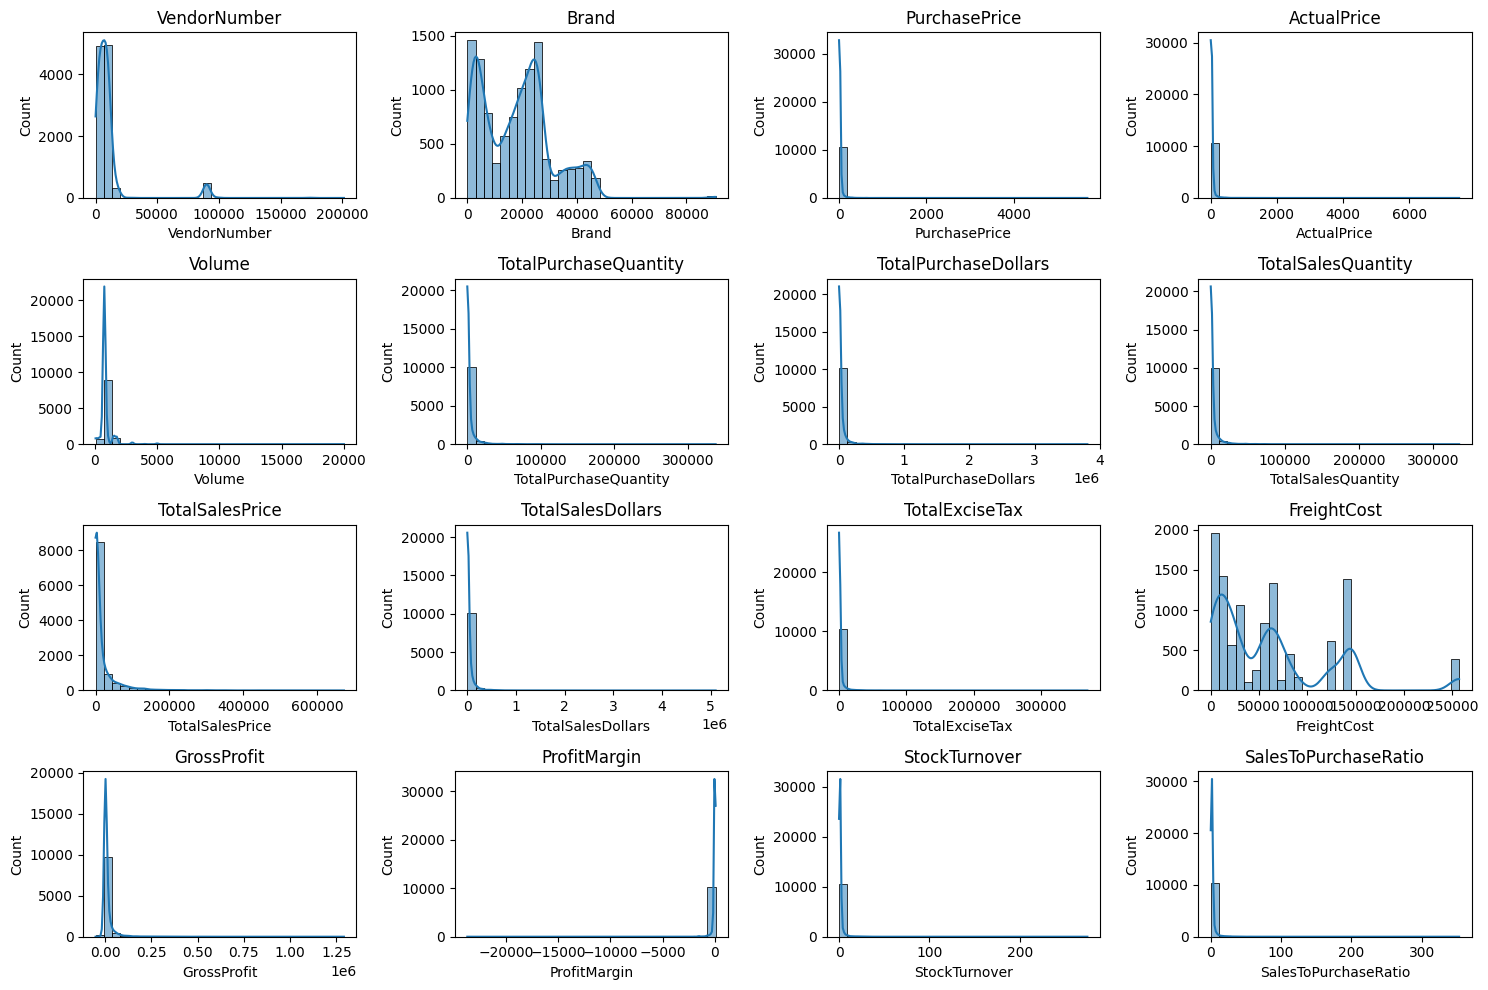

In [9]:
# distribution plots for numerical columns

num_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize = (15,10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()


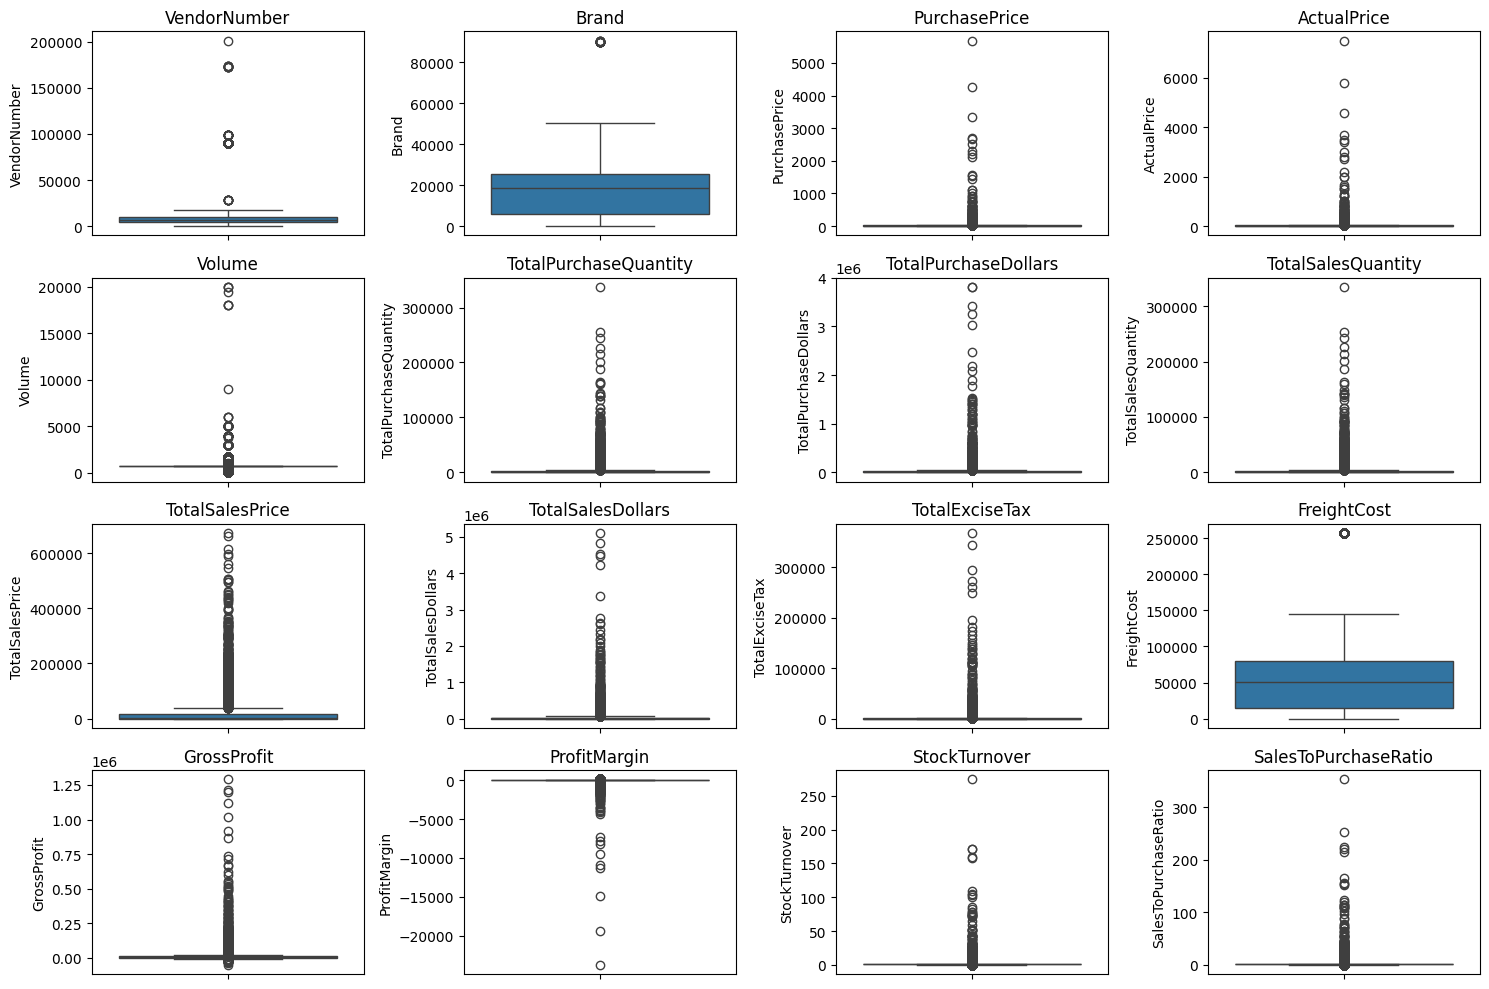

In [10]:
# Outlier Detection with Boxplots

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Insights:

Negative & Zero Values -

• Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at loss due to high costs or selling at discounts lower than the purchase price.

• Profit Margin: Has a minimum of -00, which suggests cases where revenue is zero or even lower than costs.

• Total Sales Quantity & Sales Dollars: Minimum values are O, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.


Outliers Indicated by High Standard Deviations -

•Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.

• Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.

• Stock Turnover: Ranges from O to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [11]:
# filter the data by removing inconsistencies

df_new = df[(df['GrossProfit']>0) & (df['ProfitMargin']>0) & (df['TotalSalesQuantity']>0)]
df_new.shape

(8565, 18)

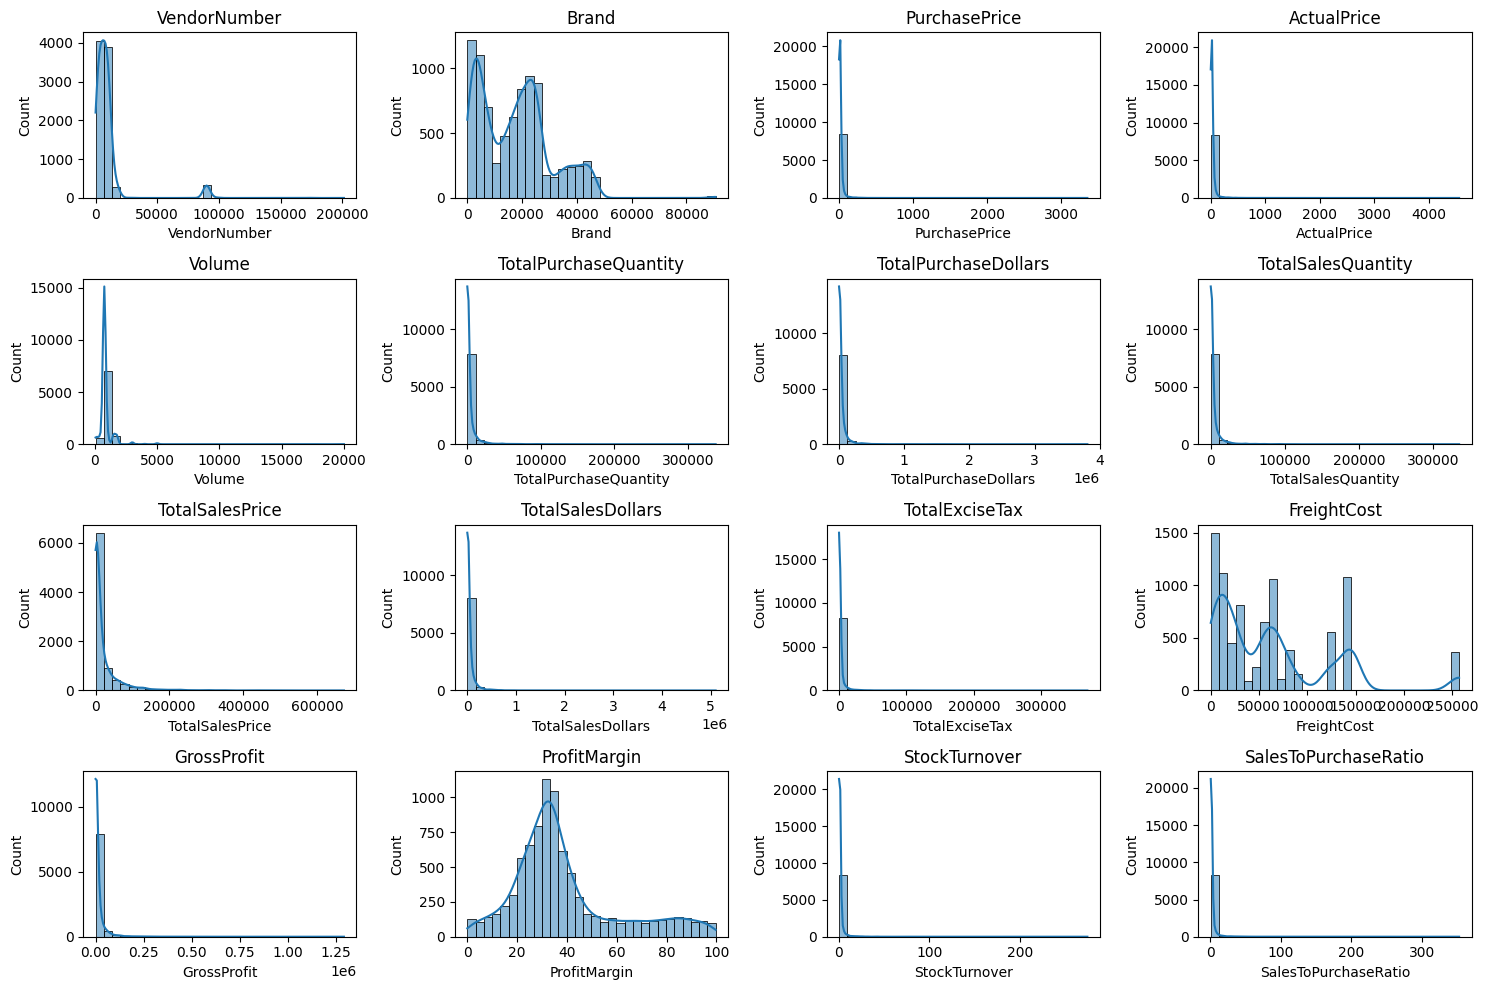

In [12]:
# distribution plots for numerical columns

num_cols = df_new.select_dtypes(include=np.number).columns

plt.figure(figsize = (15,10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df_new[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

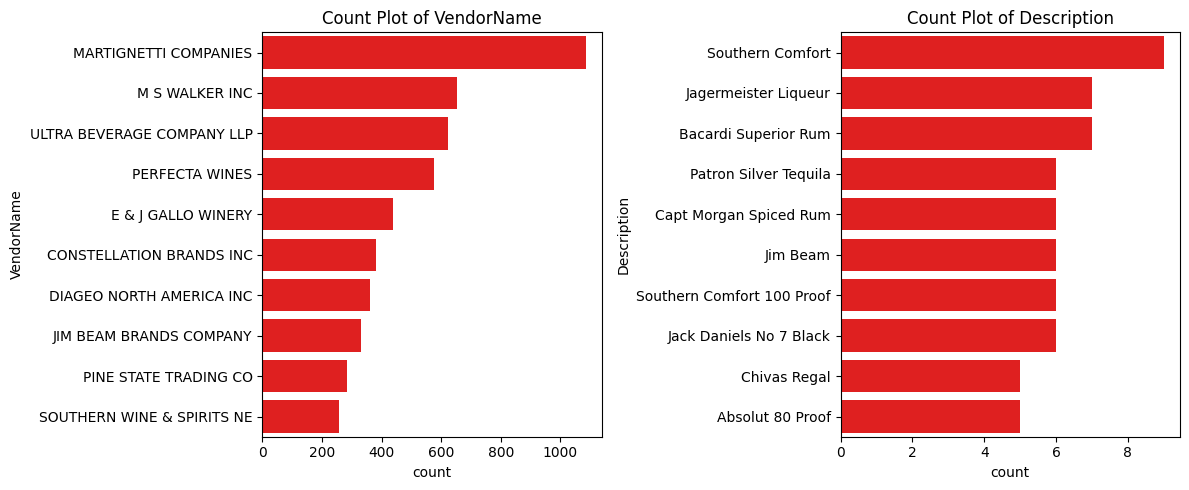

In [13]:
# Count Plots for Categorical Columns

categorical_cols = ["VendorName", "Description"]

plt.figure(figsize = (12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df_new[col], order=df_new[col].value_counts().index[:10], color='red') #Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

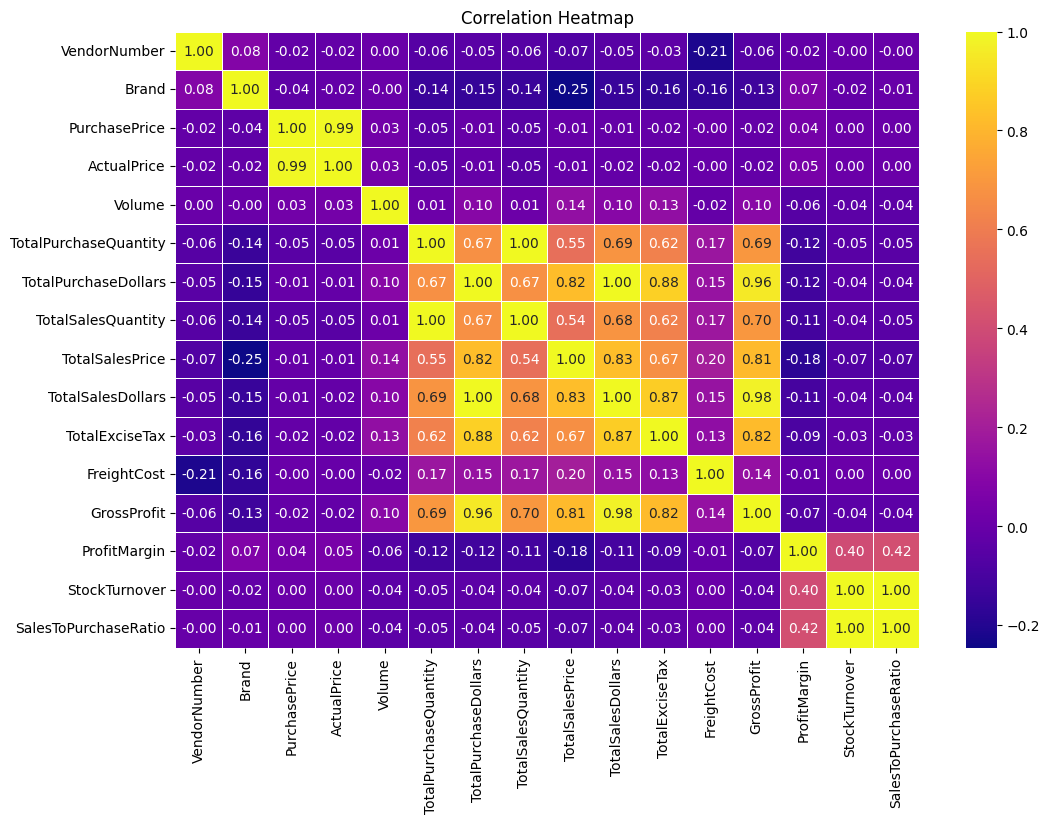

In [14]:
# Correlation Heatmap

plt.figure(figsize = (12, 8))
correlation_matrix = df_new[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="plasma", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Correlation Insights

• PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.

• Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.

• Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

• StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [15]:
brand_performance = df_new.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [16]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [17]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000] #for Better visualization

# Filter brands with low sales but high profit margins

target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >=high_margin_threshold)
]

print('Brands with Low Sales but High Profit Margins')
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


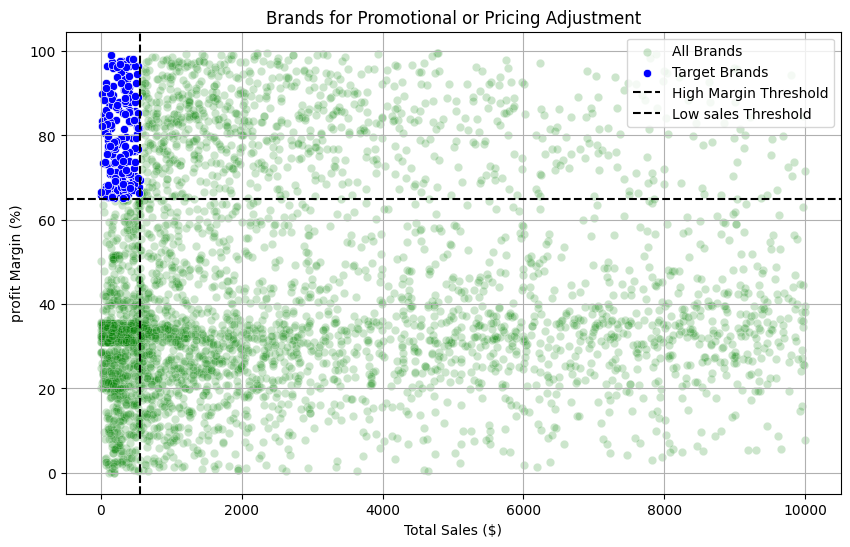

In [18]:
plt.figure(figsize =(10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="Green", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="Blue", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustment")
plt.legend()
plt.grid(True)
plt.show()

Vendors and Brands that demonstrate the highest sales performance.

In [19]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [20]:
# Top Vendors & Brands by sales Performance

top_vendors = df_new.groupby('VendorName')["TotalSalesDollars"].sum().nlargest(10)
top_brands = df_new.groupby('Description')["TotalSalesDollars"].sum().nlargest(10)


In [21]:
top_brands.apply(lambda x : format_dollars(x))

,TotalSalesDollars
Description,
Jack Daniels No 7 Black,7.96M
Tito's Handmade Vodka,7.40M
Grey Goose Vodka,7.21M
Capt Morgan Spiced Rum,6.36M
Absolut 80 Proof,6.24M
Jameson Irish Whiskey,5.72M
Ketel One Vodka,5.07M
Baileys Irish Cream,4.15M
Kahlua,3.60M


In [22]:

top_vendors.apply(lambda x : format_dollars(x))

,TotalSalesDollars
VendorName,
DIAGEO NORTH AMERICA INC,67.99M
MARTIGNETTI COMPANIES,39.33M
PERNOD RICARD USA,32.06M
JIM BEAM BRANDS COMPANY,31.42M
BACARDI USA INC,24.85M
CONSTELLATION BRANDS INC,24.22M
E & J GALLO WINERY,18.40M
BROWN-FORMAN CORP,18.25M
ULTRA BEVERAGE COMPANY LLP,16.50M


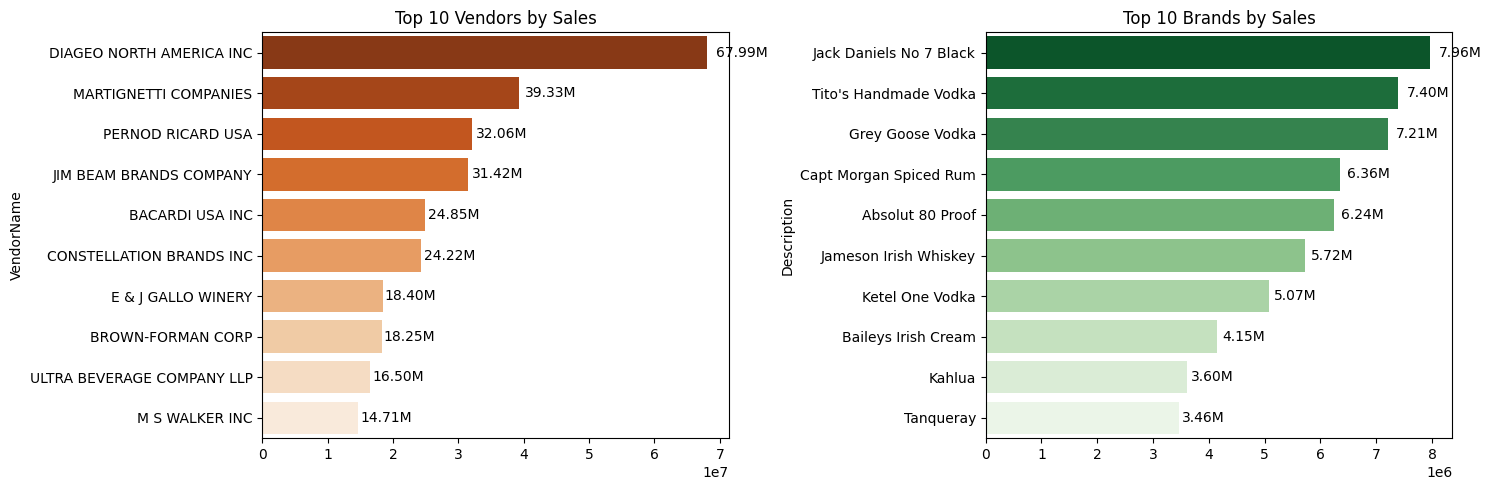

In [25]:
plt.figure(figsize=(15,5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Oranges_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars ( bar.get_width()),
        ha='left', va='center' , fontsize=10, color='Black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x= top_brands.values, palette="Greens_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()) ,
        ha='left', va='center' , fontsize=10, color='black' )

plt.tight_layout()
plt.show()

Vendors that contribute the most to total purchase dollars.

In [26]:
vendor_performance = df_new.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [27]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%' , ascending= False),2)


In [28]:
# Display Top 10 Vendors

top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [29]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


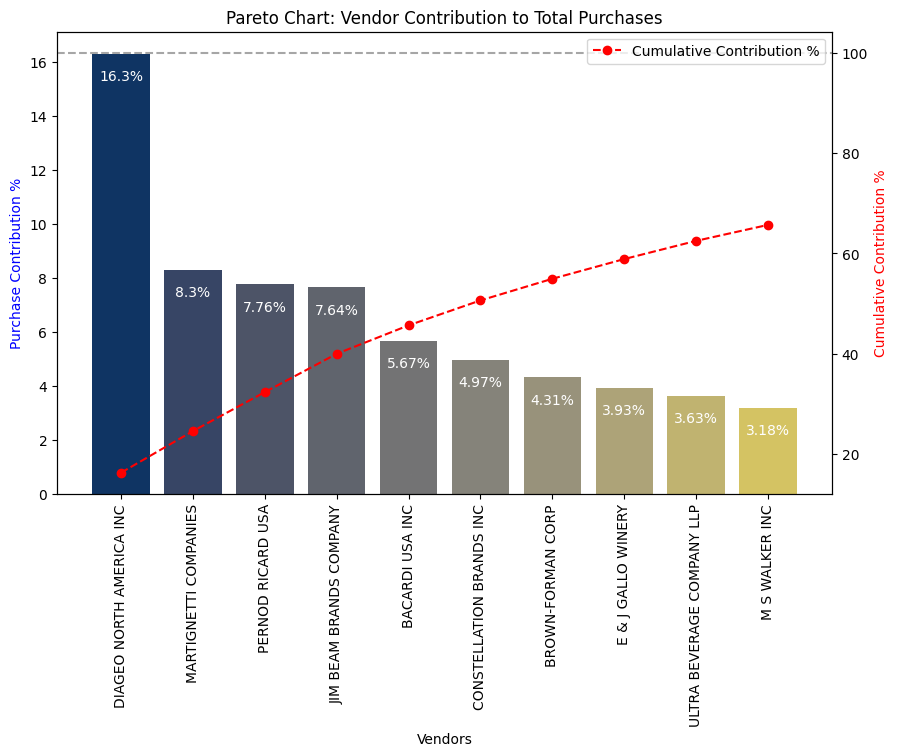

In [31]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="cividis", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label= 'Cumulative Contribution %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel( 'Cumulative Contribution %', color='red')
ax1.set_xlabel( 'Vendors' )
ax1.set_title( 'Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend( loc='upper right')

plt.show()

How much of total procurement is dependent on the top vendors?

In [32]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")


Total Purchase Contribution of top 10 vendors is 65.69 %


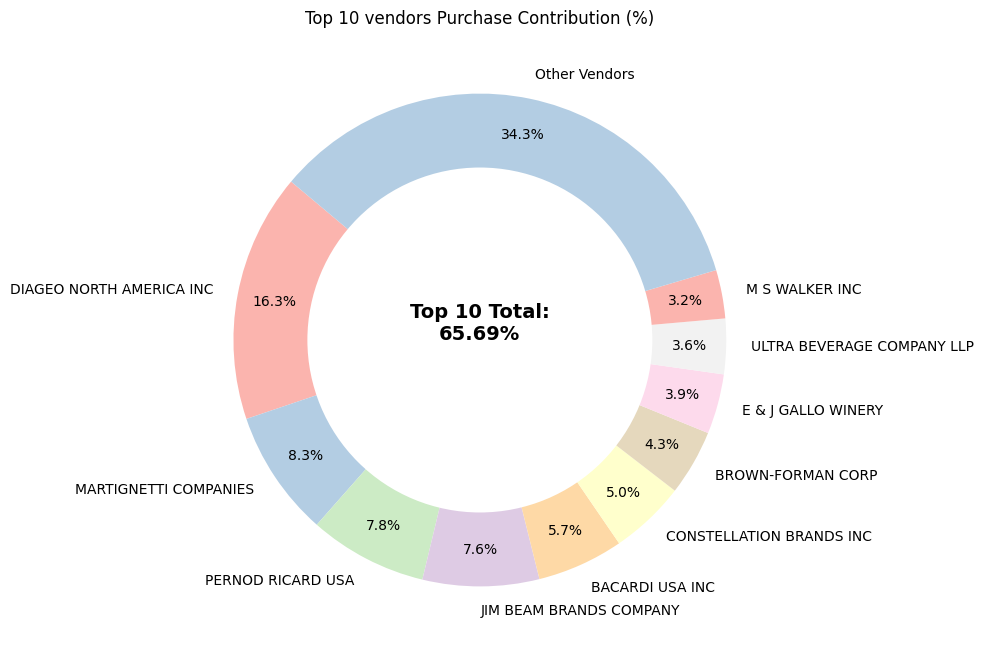

In [34]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

#Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

#Donut Chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Pastel1.colors)

#Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

#Add Total Contribution annotation in the center
plt.text(0,0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center')

plt.title("Top 10 vendors Purchase Contribution (%)")
plt.show()

Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [35]:
df_new['UnitPurchasePrice'] = df_new['TotalPurchaseDollars'] / df_new['TotalPurchaseQuantity']

df_new['OrderSize'] = pd.qcut(df_new['TotalPurchaseQuantity'], q=3, labels=["small","Medium","Large"])

df_new.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
small,39.057543
Medium,15.486414
Large,10.777625


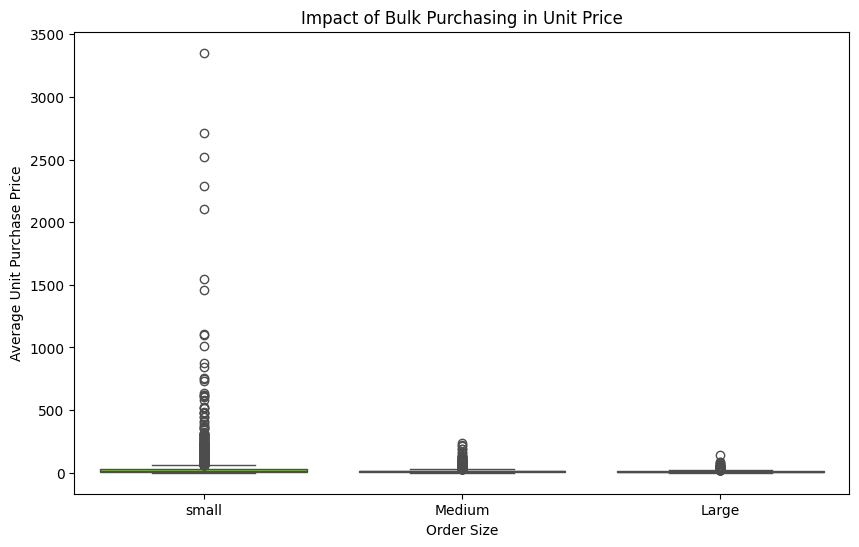

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new, x='OrderSize' , y="UnitPurchasePrice", palette="hsv")
plt.title("Impact of Bulk Purchasing in Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

• Vendors buying in bulk (Large Order Size) get the lowest unit prife ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.

• The price difference between Small and Large orders is substantial (~72% reduction in unit cost)

• This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

Which Vendor have low inventory turnover, indicating excess stock and slow-moving products?

In [37]:
df_new[df_new['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)


,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [38]:
df_new["UnsoldInventoryValue"] = (df_new["TotalPurchaseQuantity"] - df_new["TotalSalesQuantity"]) * df_new["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df_new["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 2.71M


In [39]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df_new.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort vendors with Highest locked Capital
inventory_value_per_vendor  = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors?

In [40]:
top_threshold = df_new["TotalSalesDollars"].quantile(0.75)
low_threshold = df_new["TotalSalesDollars"].quantile(0.25)

In [41]:
top_vendors = df_new[df_new["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df_new[df_new["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [42]:
def confidence_interval(data, confidence = 0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)-1)
    t_critical = stats.t.ppf((1 + confidence) / 2, df = len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (30.74, 31.61, Mean: 31.17)
Low Vendors 95% CI: (40.48, 42.62, Mean: 41.55)


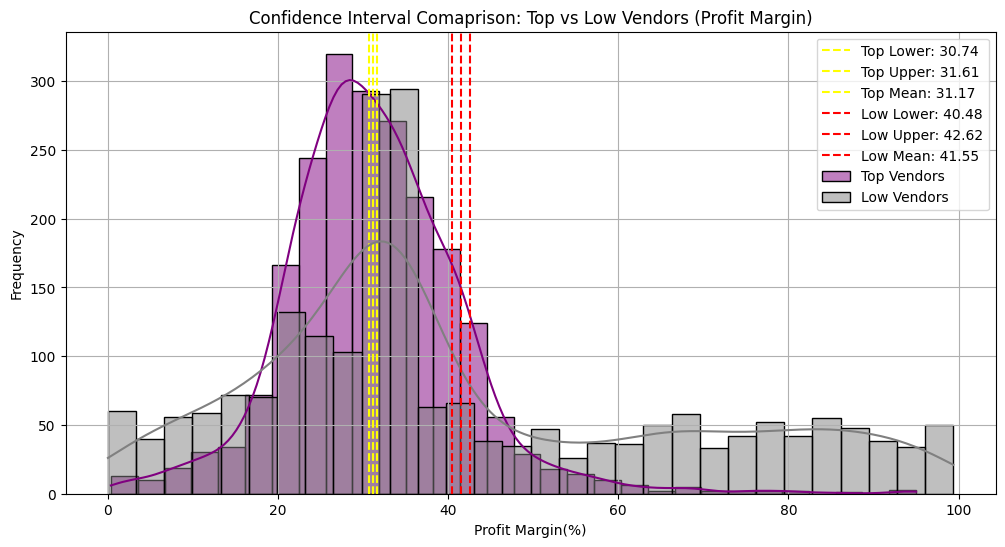

In [43]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}, Mean: {top_mean:.2f})")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}, Mean: {low_mean:.2f})")

plt.figure(figsize=(12,6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="purple", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="yellow", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="yellow", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="yellow", linestyle="--", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="grey", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="--", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comaprison: Top vs Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin(%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

•  The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).

• This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.

• For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.

• For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

Ho (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H1 (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [44]:
top_threshold = df_new["TotalSalesDollars"].quantile(0.75)
low_threshold = df_new["TotalSalesDollars"].quantile(0.25)

top_vendors = df_new[df_new["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df_new[df_new["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistics: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: There is a significant difference in profit margins between top and low_performing vendors.")
else:
    print("Fail to Reject h0: No significant difference in profit margins")

T-Statistics: -17.6440, P-Value: 0.0000
Reject H0: There is a significant difference in profit margins between top and low_performing vendors.


In [ ]:
# dff = df[(df['GrossProfit']>0) & (df['ProfitMargin']>0) & (df['TotalSalesQuantity']>0)]

# project_id = "tonal-studio-480404-r9"
# destination_table = "vendordata.vendor_summary2"

# pandas_gbq.to_gbq(
#     dff,
#     destination_table=destination_table,
#     project_id=project_id,
#     if_exists="replace",
# )

100%|██████████| 1/1 [00:00<00:00, 9642.08it/s]
